# Exploratory Data Analysis for Final Project

In this assignment, your task is to put your new skils to use in the form of an open-ended, exploratory data analysis. In particular, I'm looking for you to demonstrate your ability to use the programmatic tools we've been learning to access data, manipulate it, and visualize some findings while working towards the ultimate goal of developing a final project proposal. Please include the following in your assignment:

  1. A brief summary of the topic (a few sentences)
  2. Access 2 or more datasets, at least one of them using an API (if you are not using any data from an API as part of your project yet, don’t worry about it, and just do this to get some exercise using APIs. You might use it later).
  3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
  4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.
  5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
  6. Include a short written analysis of your interpretation of the data.
  7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

Note that this exercise is intended to help you formulate your project topic. But it is not a binding contract. Your project will most likely evolve over the rest of the semester. So use this as an opportunity to be creative, throw some ideas against the wall and see what sticks. I will release the final project guidelines shortly. In the meantime, dig in!

And as always, please submit this assignment both as a PR on GitHub along with the URL of your PR on bCourses.

1. Poverty is a huge concern in the Bay Area, especially in Alameda County. Oakland has a higher poverty (13.21%) than the national average (12.6%), though it is improved in recent years. Moreover, crime has risen as well, which may be due to desperate measures to make money during difficult times. In this initial analysis, I explore the intersection between crime, poverty, and 311 calls in Oakland.

2.

In [27]:
import pandas as pd
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs
import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [28]:
poverty = pd.read_excel('poverty.xlsx')

In [29]:
poverty

,Label,Estimate,Margin of Error,Estimate.1,Margin of Error.1,Estimate.2,Margin of Error.2
0,Population for whom poverty status is determined,"1,599,844","±1,875","161,706","±9,226",10.1%,±0.6
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"312,600","±1,819","31,978","±4,985",10.2%,±1.6
3,Under 5 years,"82,057","±1,062","9,786","±2,432",11.9%,±3.0
4,5 to 17 years,"230,543","±1,293","22,192","±3,432",9.6%,±1.5
...,...,...,...,...,...,...,...
64,Mean income deficit for unrelated individuals ...,"9,584",±340,(X),(X),(X),(X)
65,"Worked full-time, year-round in the past 12 mo...","164,640","±8,423","4,525","±1,337",2.7%,±0.8
66,"Worked less than full-time, year-round in the ...","78,420","±5,964","24,913","±3,745",31.8%,±3.6
67,Did not work,"105,073","±6,176","52,481","±4,628",49.9%,±2.8


In [30]:
endpoint_url = "https://data.oaklandca.gov/resource/kzer-wcj5.json"
response = requests.get(endpoint_url)

In [5]:
crime = pd.read_json(endpoint_url)
crime

,crimetype,datetime,casenumber,description,policebeat
0,MISDEMEANOR ASSAULT,2023-12-12 00:01:00,23-065522,BATTERY,19X
1,ROBBERY,2023-12-12 11:45:00,23-065620,ATTEMPTED ROBBERY-STRONG-ARM,22Y
2,THREATS,2023-12-16 23:20:00,23-066341,BATTERY,24Y
3,WEAPONS,2023-12-22 13:54:00,23-067380,FELON/ADDICT/POSSESS/OWN/ETC FIREARM,27Y
4,VANDALISM,2023-12-24 20:09:00,23-067757,VANDALISM,07X
...,...,...,...,...,...
995,NaN,2024-01-07 14:23:00,24-001204,BATTERY:SPOUSE/EX SPOUSE/DATE/ETC,06X
996,NaN,2024-01-28 04:45:00,24-004833,WILLFUL DISCHARGE FIREARM IN NEGLIGENT MANNER,30X
997,BURG - AUTO,2023-12-19 21:15:00,24-901102,BURGLARY-AUTO,01X
998,NaN,2024-01-09 21:13:00,24-001616,VEHICLE THEFT - AUTO,07X


In [6]:
calls = pd.read_csv('311.csv')
calls

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Zipcode
0,1092511,02/26/2021 03:37:27 PM,Email,City Bldg - Clean / Custodial,BLDGMAINT,NaN,CLOSED,NaN,04/13/2021 12:26:33 PM,NaN,NaN,NaN,NaN,MAXWELL PARK - RESTROOM,Oakland,CA,NaN
1,1319572,07/28/2023 08:57:26 AM,SeeClickFix,Parking - Enforcement,PARKING,"(37.7348199929233, -122.2006649756992)",OPEN,NaN,NaN,6.069899e+06,2.094495e+06,CCD7,31X,LEET DR,Oakland,CA,94621.0
2,1319421,07/27/2023 03:53:54 PM,Phone,Parking (On Street),PARKING,"(37.80267929404058, -122.26696109306175)",OPEN,NaN,NaN,6.051198e+06,2.119555e+06,CCD3,04X,272 14TH ST,Oakland,CA,94612.0
3,1028664,07/20/2020 10:38:32 AM,Phone,Tree - Permit,STREETSW,"(37.79211911541205, -122.24761294408194)",OPEN,NaN,NaN,6.056715e+06,2.115605e+06,CCD2,19X,1524 11TH AVE,Oakland,CA,94606.0
4,1029046,07/21/2020 10:00:54 AM,SeeClickFix,Litter in Parks,KOCB,"(37.80747412002417, -122.28367388060215)",CANCEL,NaN,NaN,6.046403e+06,2.121392e+06,CCD3,02X,LOWELL PARK,Oakland,CA,94607.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913360,986854,02/13/2020 05:59:55 PM,SeeClickFix,Obstruction (not Construction) Street/Sidew/Pa...,ROW_INSPECTORS,"(37.778000000931975, -122.22836999886813)",CANCEL,NaN,NaN,6.062179e+06,2.110362e+06,CCD5,20X,1236 30TH AVE,Oakland,CA,94601.0
913361,994649,03/10/2020 04:45:58 PM,SeeClickFix,Code Enforcement,OTHER,"(37.795830390680656, -122.25079497597187)",REFERRED,"CODE ENFORCEMENT,",NaN,6.055821e+06,2.116974e+06,CCD2,19X,637 FOOTHILL BLVD,Oakland,CA,94606.0
913362,994562,03/10/2020 02:35:12 PM,SeeClickFix,"City Bldg - Heating, Ventilation, and Cooling",BLDGMAINT,"(37.80296099961442, -122.2657289980457)",CLOSED,NaN,03/18/2020 04:00:27 PM,6.051556e+06,2.119651e+06,CCD3,04X,MALONGA CASQUELOURD CENTER (AKA ALICE ARTS),Oakland,CA,94612.0
913363,989059,02/21/2020 01:42:07 PM,Other,City Bldg - Other/Complex,BLDGMAINT,"(37.80498552638244, -122.27137951934573)",CLOSED,NaN,03/31/2020 09:31:52 AM,6.049937e+06,2.120418e+06,CCD3,04X,150 FRANK H OGAWA PLZ,Oakland,CA,94612.0


In [7]:
pov_zip = pd.read_csv('pov_zip.csv')
pov_zip

Geography,"Geographic Area Name","Estimate!!Total!!Population for whom poverty status is determined","Margin of Error!!Total!!Population for whom poverty status is determined","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Related children of householder under 18 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!Under 18 years!!Related children of householder under 18 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!18 to 34 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!18 to 34 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!35 to 64 years","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!18 to 64 years!!35 to 64 years","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!60 years and over","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!60 years and over","Estimate!!Total!!Population for whom poverty status is determined!!AGE!!65 years and over","Margin of Error!!Total!!Population for whom poverty status is determined!!AGE!!65 years and over","Estimate!!Total!!Population for whom poverty status is determined!!SEX!!Male","Margin of Error!!Total!!Population for whom poverty status is determined!!SEX!!Male","Estimate!!Total!!Population for whom poverty status is determined!!SEX!!Female","Margin of Error!!Total!!Population for whom poverty status is determined!!SEX!!Female","Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone","Margin of Error!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!White alone","Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone","Margin of Error!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Black or African American alone","Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone","Margin of Error!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!American Indian and Alaska Native alone","Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone","Margin of Error!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Asian alone","Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone","Margin of Error!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Native Hawaiian and Other Pacific Islander alone","Estimate!!Total!!Population for whom poverty status is determined!!RACE AND HISPANIC OR LATINO ORIGIN!!Some other race alone","Margin of Error!!Total!!Population for whom poverty status is determined!!RACE AND HISPANI

In [8]:
#3. Demonstrate the use of Pandas operations to filter out missing data and/or outliers.
crime['crimetype'].describe()

count             441
unique             31
top       BURG - AUTO
freq               85
Name: crimetype, dtype: object

In [9]:
crime.columns

Index(['crimetype', 'datetime', 'casenumber', 'description', 'policebeat'], dtype='object')

In [10]:
print(crime['crimetype'].dropna())


0      MISDEMEANOR ASSAULT
1                  ROBBERY
2                  THREATS
3                  WEAPONS
4                VANDALISM
              ...         
984                  OTHER
985      BURG - COMMERCIAL
987                ROBBERY
990         STOLEN VEHICLE
997            BURG - AUTO
Name: crimetype, Length: 441, dtype: object


In [11]:
crime_cleaned = crime.dropna(subset=['crimetype']).copy()
print(crime_cleaned)

               crimetype            datetime casenumber  \
0    MISDEMEANOR ASSAULT 2023-12-12 00:01:00  23-065522   
1                ROBBERY 2023-12-12 11:45:00  23-065620   
2                THREATS 2023-12-16 23:20:00  23-066341   
3                WEAPONS 2023-12-22 13:54:00  23-067380   
4              VANDALISM 2023-12-24 20:09:00  23-067757   
..                   ...                 ...        ...   
984                OTHER 2023-12-16 03:00:00  23-066274   
985    BURG - COMMERCIAL 2024-01-04 00:43:00  24-000649   
987              ROBBERY 2023-12-29 16:30:00  23-068612   
990       STOLEN VEHICLE 2024-01-19 16:00:00  24-003493   
997          BURG - AUTO 2023-12-19 21:15:00  24-901102   

                                           description policebeat  
0                                              BATTERY        19X  
1                         ATTEMPTED ROBBERY-STRONG-ARM        22Y  
2                                              BATTERY        24Y  
3                 F

In [12]:
values_to_drop = ['BLDGMAINT', 'STREETSW', 'OTHER', 'KOCB']

calls = calls[~calls['REQCATEGORY'].isin(values_to_drop)]
calls
calls_cleaned = calls.dropna(subset=['REQCATEGORY']).copy()
calls_cleaned = calls.dropna(subset=['Zipcode']).copy()
calls_cleaned

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,REQADDRESS,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,PROBADDRESS,City,State,Zipcode
1,1319572,07/28/2023 08:57:26 AM,SeeClickFix,Parking - Enforcement,PARKING,"(37.7348199929233, -122.2006649756992)",OPEN,NaN,NaN,6.069899e+06,2.094495e+06,CCD7,31X,LEET DR,Oakland,CA,94621.0
2,1319421,07/27/2023 03:53:54 PM,Phone,Parking (On Street),PARKING,"(37.80267929404058, -122.26696109306175)",OPEN,NaN,NaN,6.051198e+06,2.119555e+06,CCD3,04X,272 14TH ST,Oakland,CA,94612.0
10,1319584,07/28/2023 09:28:01 AM,SeeClickFix,Parking - Enforcement,PARKING,"(37.81992300675758, -122.26809499918433)",OPEN,NaN,NaN,6.050989e+06,2.125839e+06,CCD3,08X,529 31ST ST,Oakland,CA,94609.0
11,979834,01/21/2020 04:20:15 PM,SeeClickFix,Inspections - Utility-Related Infrastructure,ROW_INSPECTORS,"(37.80512100151793, -122.2267274987527)",REFERRED,"AT&T,",NaN,6.062836e+06,2.120227e+06,CCD5,16Y,3900 PARK BLVD,Oakland,CA,94602.0
12,1000124,04/06/2020 09:42:10 AM,SeeClickFix,Obstruction (Construction) - Sidewalk,ROW_INSPECTORS,"(37.772028801100475, -122.20089529728462)",REFERRED,"PG&E,",NaN,6.070079e+06,2.108042e+06,CCD4,27X,5333 FAIRFAX AVE,Oakland,CA,94601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913355,995649,03/13/2020 09:04:07 PM,SeeClickFix,Illegal Dumping – mattress/boxspring,ILLDUMP,"(37.81148400093239, -122.2753544988682)",CANCEL,NaN,NaN,6.048834e+06,2.122806e+06,CCD3,05X,2020 BRUSH ST,Oakland,CA,94612.0
913356,997065,03/21/2020 04:43:06 PM,SeeClickFix,Obstruction (not Construction) Street/Sidew/Pa...,ROW_INSPECTORS,"(37.75588620093123, -122.15121249886751)",CANCEL,NaN,NaN,6.084333e+06,2.101908e+06,CCD7,35X,9514 ALCALA AVE,Oakland,CA,94605.0
913358,991379,02/28/2020 04:06:49 PM,SeeClickFix,Obstruction (not Construction) Street/Sidew/Pa...,ROW_INSPECTORS,"(37.795650300932145, -122.2491682988681)",CANCEL,NaN,NaN,6.056290e+06,2.116899e+06,CCD2,17X,737 E 17TH ST,Oakland,CA,94606.0
913360,986854,02/13/2020 05:59:55 PM,SeeClickFix,Obstruction (not Construction) Street/Sidew/Pa...,ROW_INSPECTORS,"(37.778000000931975, -122.22836999886813)",CANCEL,NaN,NaN,6.062179e+06,2.110362e+06,CCD5,20X,1236 30TH AVE,Oakland,CA,94601.0


In [13]:
calls_cleaned['Zipcode']

1         94621.0
2         94612.0
10        94609.0
11        94602.0
12        94601.0
           ...   
913355    94612.0
913356    94605.0
913358    94606.0
913360    94601.0
913364    94610.0
Name: Zipcode, Length: 440873, dtype: float64

In [14]:
print(calls_cleaned['Zipcode'].dtype)

float64


In [15]:
young = poverty["Label"] ==  "Under 18 years"
middle = poverty["Label"] ==  "18 to 64 years"
old = poverty["Label"] ==  "65 years and over"
age_poverty = poverty[young | middle | old]
age_poverty.loc[:, 'Estimate'] = age_poverty['Estimate'].replace(',', '', regex=True).astype(float)

In [16]:
#4. Demonstrate your capacity to use some of the "group-by" operations to produce pivot tables or statistical summaries of your data.

#How many 311 calls in each zip code?
calls_cleaned[['REQCATEGORY', 'Zipcode']].groupby('Zipcode').count()

,REQCATEGORY
Zipcode,
94601.0,53705
94602.0,21355
94603.0,33818
94605.0,51201
94606.0,38260
94607.0,53364
94608.0,26092
94609.0,27669
94610.0,20425


In [17]:
result = calls_cleaned.groupby(['Zipcode', 'REQCATEGORY']).size().reset_index(name='Count')
result

,Zipcode,REQCATEGORY,Count
0,94601.0,ABANDONED AUTO,4703
1,94601.0,CUT_CLEAN,174
2,94601.0,DRAINAGE,573
3,94601.0,ELECTRICAL,1392
4,94601.0,ENVIRON_ENF,140
...,...,...,...
410,94720.0,POLICE,1
411,94720.0,ROW_INSPECTORS,2
412,94720.0,TRAFFIC,5
413,94720.0,TRAFFIC_ENGIN,1


In [18]:
poverty

,Label,Estimate,Margin of Error,Estimate.1,Margin of Error.1,Estimate.2,Margin of Error.2
0,Population for whom poverty status is determined,"1,599,844","±1,875","161,706","±9,226",10.1%,±0.6
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN
2,Under 18 years,"312,600","±1,819","31,978","±4,985",10.2%,±1.6
3,Under 5 years,"82,057","±1,062","9,786","±2,432",11.9%,±3.0
4,5 to 17 years,"230,543","±1,293","22,192","±3,432",9.6%,±1.5
...,...,...,...,...,...,...,...
64,Mean income deficit for unrelated individuals ...,"9,584",±340,(X),(X),(X),(X)
65,"Worked full-time, year-round in the past 12 mo...","164,640","±8,423","4,525","±1,337",2.7%,±0.8
66,"Worked less than full-time, year-round in the ...","78,420","±5,964","24,913","±3,745",31.8%,±3.6
67,Did not work,"105,073","±6,176","52,481","±4,628",49.9%,±2.8


In [19]:
age_poverty

,Label,Estimate,Margin of Error,Estimate.1,Margin of Error.1,Estimate.2,Margin of Error.2
2,Under 18 years,312600.0,"±1,819","31,978","±4,985",10.2%,±1.6
6,18 to 64 years,1036809.0,±824,"100,622","±6,057",9.7%,±0.6
10,65 years and over,250435.0,±620,"29,106","±2,768",11.6%,±1.1


Poverty is the highest among those aged 18-64.

In [20]:
crime_cleaned['crimetype'].describe()

count             441
unique             31
top       BURG - AUTO
freq               85
Name: crimetype, dtype: object

In [21]:
pd.crosstab(index=calls_cleaned['Zipcode'], columns=calls_cleaned['REQCATEGORY'], margins=True, margins_name='Total')


REQCATEGORY,ABANDONED AUTO,CUT_CLEAN,CW_DIT_GIS,DRAINAGE,ELECTRICAL,ENVIRON_ENF,FACILITIES,FIRE,GRAFFITI,HE_CLEAN,...,ROW_INSPECTORS,ROW_STREETSW,SEWERS,SIDESHOWS,SURVEY,TRAFFIC,TRAFFIC_ENGIN,TREES,WATERSHED,Total
Zipcode,,,,,,,,,,,,,,,,,,,,,
94601.0,4703,174,0,573,1392,140,0,450,1264,1216,...,795,386,596,185,0,953,701,1003,43,53705
94602.0,1686,190,0,391,659,39,1,121,451,221,...,543,293,502,46,1,542,575,1122,39,21355
94603.0,3389,159,0,364,715,95,0,276,375,1006,...,443,206,379,69,0,590,481,670,22,33818
94605.0,4788,500,1,617,917,150,1,363,795,597,...,672,373,650,46,1,832,635,1485,40,51201
94606.0,2152,136,1,415,1231,132,0,224,748,862,...,564,324,331,85,0,685,577,811,23,38260
94607.0,2502,324,1,760,2238,163,4,254,5487,1896,...,1233,440,379,17,1,1621,758,858,19,53364
94608.0,1674,127,0,226,497,50,0,154,2134,747,...,437,258,217,32,0,950,427,563,5,26092
94609.0,1619,101,0,311,1008,47,0,115,1967,1096,...,609,370,262,5,0,752,493,1153,15,27669
94610.0,1141,209,0,394,1022,29,2,65,856,608,...,478,326,416,30,0,619,616,930,13,20425


<Axes: title={'center': 'Zip'}, xlabel='REQCATEGORY'>

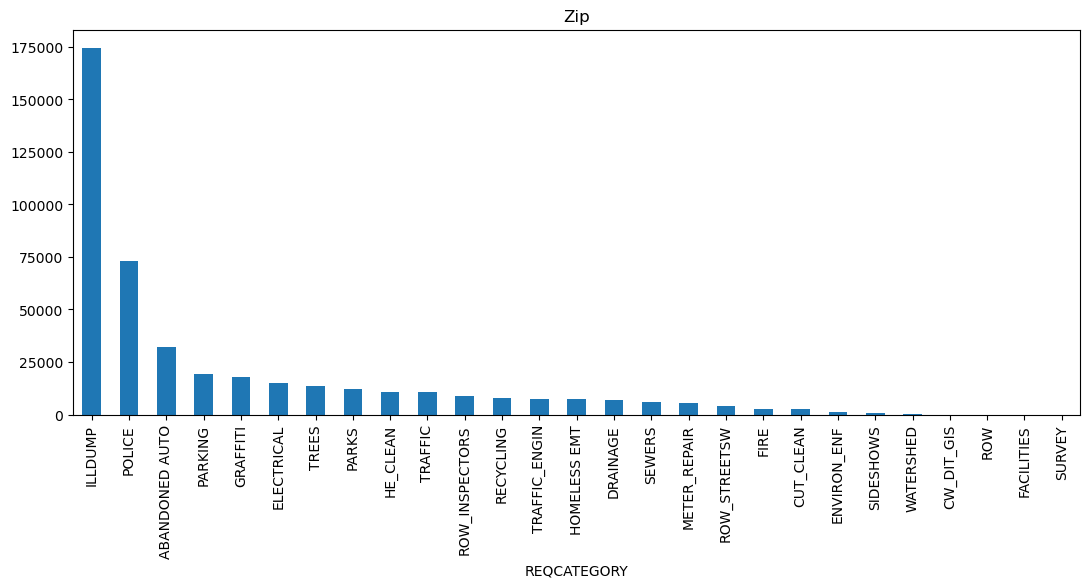

In [22]:
#5. Use Matplotlib or Seaborn to produce 2-3 data visualizations of your data to both explore the data and highlight any notable patterns.
fig, axarr = plt.subplots(figsize=(13,5))
calls_cleaned['REQCATEGORY'].value_counts(sort=True).plot(kind='bar', title='Zip')

Illegal dumping is by far the highest reason for 311 calls in the whole Oakland population.

<Axes: xlabel='Zipcode'>

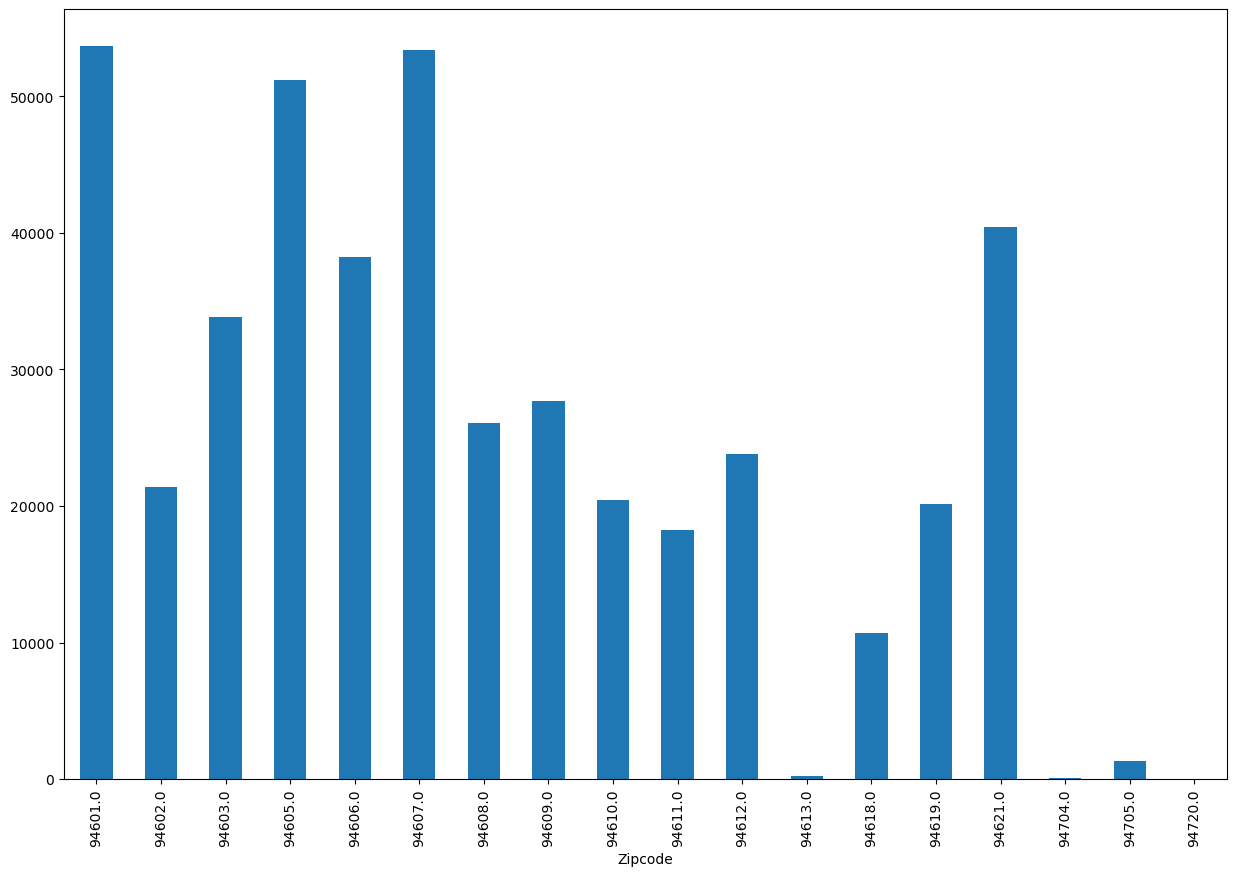

In [23]:
fig, ax = plt.subplots(figsize=(15,10))
calls_cleaned.groupby(['Zipcode'])['REQCATEGORY'].count().plot(kind='bar', ax=ax)

The zip codes with the highest number of 311 calls are also the ones that were historically redlined.

In [24]:
calls_cleaned.groupby(['Zipcode', 'REQCATEGORY'])['Zipcode'].count().unstack()


REQCATEGORY,ABANDONED AUTO,CUT_CLEAN,CW_DIT_GIS,DRAINAGE,ELECTRICAL,ENVIRON_ENF,FACILITIES,FIRE,GRAFFITI,HE_CLEAN,...,ROW,ROW_INSPECTORS,ROW_STREETSW,SEWERS,SIDESHOWS,SURVEY,TRAFFIC,TRAFFIC_ENGIN,TREES,WATERSHED
Zipcode,,,,,,,,,,,,,,,,,,,,,
94601.0,4703.0,174.0,NaN,573.0,1392.0,140.0,NaN,450.0,1264.0,1216.0,...,2.0,795.0,386.0,596.0,185.0,NaN,953.0,701.0,1003.0,43.0
94602.0,1686.0,190.0,NaN,391.0,659.0,39.0,1.0,121.0,451.0,221.0,...,NaN,543.0,293.0,502.0,46.0,1.0,542.0,575.0,1122.0,39.0
94603.0,3389.0,159.0,NaN,364.0,715.0,95.0,NaN,276.0,375.0,1006.0,...,NaN,443.0,206.0,379.0,69.0,NaN,590.0,481.0,670.0,22.0
94605.0,4788.0,500.0,1.0,617.0,917.0,150.0,1.0,363.0,795.0,597.0,...,2.0,672.0,373.0,650.0,46.0,1.0,832.0,635.0,1485.0,40.0
94606.0,2152.0,136.0,1.0,415.0,1231.0,132.0,NaN,224.0,748.0,862.0,...,2.0,564.0,324.0,331.0,85.0,NaN,685.0,577.0,811.0,23.0
94607.0,2502.0,324.0,1.0,760.0,2238.0,163.0,4.0,254.0,5487.0,1896.0,...,NaN,1233.0,440.0,379.0,17.0,1.0,1621.0,758.0,858.0,19.0
94608.0,1674.0,127.0,NaN,226.0,497.0,50.0,NaN,154.0,2134.0,747.0,...,3.0,437.0,258.0,217.0,32.0,NaN,950.0,427.0,563.0,5.0
94609.0,1619.0,101.0,NaN,311.0,1008.0,47.0,NaN,115.0,1967.0,1096.0,...,NaN,609.0,370.0,262.0,5.0,NaN,752.0,493.0,1153.0,15.0
94610.0,1141.0,209.0,NaN,394.0,1022.0,29.0,2.0,65.0,856.0,608.0,...,1.0,478.0,326.0,416.0,30.0,NaN,619.0,616.0,930.0,13.0


<Axes: title={'center': '311 Call Type by Zip'}, xlabel='311 Call Request Category', ylabel='count'>

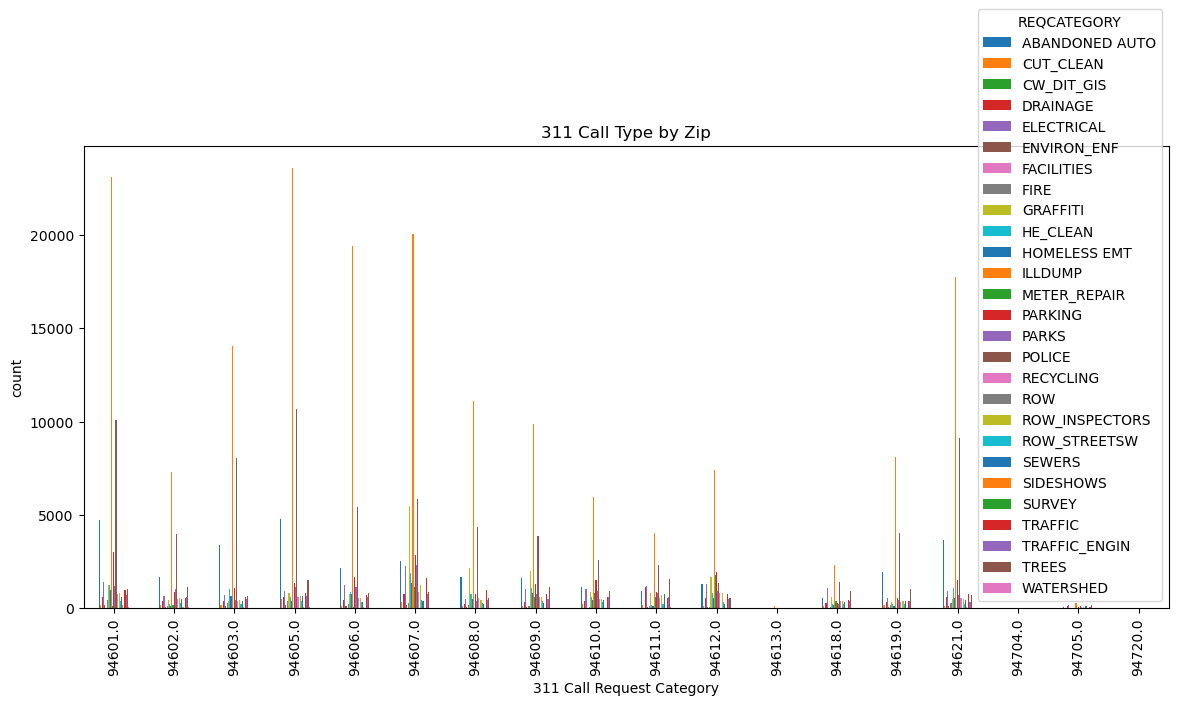

In [25]:
calls_cleaned.groupby(['Zipcode', 'REQCATEGORY'])['Zipcode'].count().unstack(level=1).plot(kind='bar', figsize=(14,6), title='311 Call Type by Zip', ylabel='count', xlabel='311 Call Request Category')

Stratifying 311 call by reason, Illegal dumping is the most common 311 call request across most zip codes.

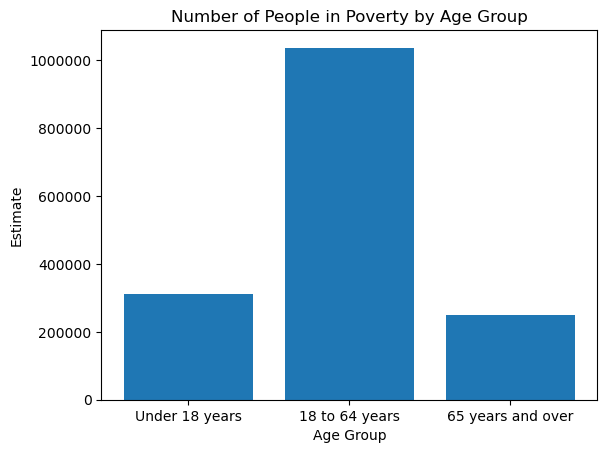

In [26]:
import matplotlib.pyplot as plt

# Assuming 'age_poverty' is your DataFrame
labels = age_poverty['Label']
estimates = age_poverty['Estimate']

# Create a bar plot
plt.bar(labels, estimates)

# Customize the y-axis tick labels to disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Estimate')
plt.title('Number of People in Poverty by Age Group')

# Display the plot
plt.show()


The highest number of people in poverty are adults aged 18-64.

<Axes: xlabel='crimetype'>

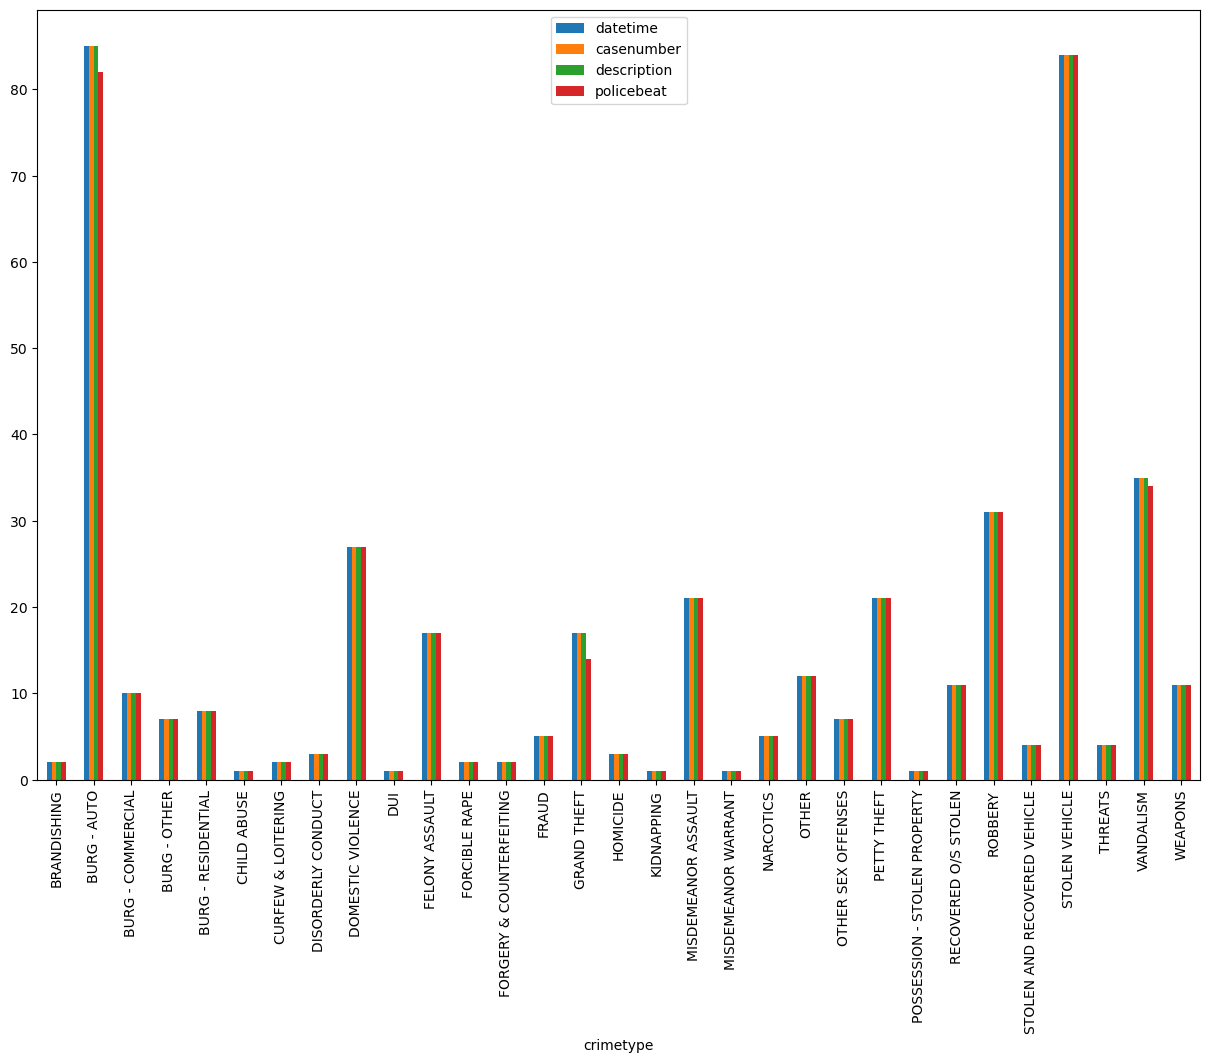

In [33]:
fig, ax = plt.subplots(figsize=(15,10))
crime_cleaned.groupby(['crimetype']).count().plot(kind='bar', ax=ax)

Most of the crimes committed in Oakland are burglary and stolen vehicles.

6. Include a short written analysis of your interpretation of the data.

In this initial exploratory analysis, I wanted to explore poverty, crime, and city 311 calls in Oakland, California. Poverty is high in age groups 18-64 and lowest for ages 65 and older. Crime rates are highest for the burglary and stolen vehicles, and the most 311 calls are for illegal dumping. The most crimes were reported in zip codes 94601, 94607, and 94605 which are historically redlined areas.

7. In a few paragraphs, describe the research question you intend to investigate in your final project, and the plan for the data analysis you intend to perform.

The research question I want to explore is, is there an association between socioeconomic status (SES) and redlining and crime rates? If so, what are the solutions to address these urgent issues? How are these factors related to public health issues, like access to clean safe drinking water and good air quality? These problems are all intertangled and although they are well known to the changemakers, crimes and poverty has not improved.

Moreover, I want to explore the demographics of those living with lower SES. Who is most at risk by race/ethnicity, age, employment status?

Data analysis Plan:

-Descriptive statistics about SES status and demographics by neighborhood/zip code

-Linking poverty rates, crime rates, access to clean water, air quality by zip code or neighborhood. 

-Explore the association between these poverty and all the factors mentioned above 

-See if those relationships are linear? positive? negative?